In [ ]:
pip install gdown

In [ ]:
pip install gdown
gdown 19LSrZHYQqJSdKgH8Mtlgg7-i-L3eRhbh
unzip D-Fire.zip -d path/to/where/you/want/to/unzip



2.3.2 Preprocess the dataset


D-Fire
- | train
- - -| images
- - -| labels
- | test
- - -| images
- - -| labels

In [ ]:
#pip install shutil

import os
import random
import shutil

train_images_folder = "D-Fire/train/images"
train_labels_folder = "D-Fire/train/labels"
val_images_folder = "D-Fire/val/images"
val_labels_folder = "D-Fire/val/labels"

# Create the validation folders if they don't exist
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Get the list of image files in the train set
image_files = os.listdir(train_images_folder)

# Calculate the number of images to move to the validation set
num_val_images = int(0.1 * len(image_files))

# Randomly select the images to move
val_image_files = random.sample(image_files, num_val_images)

# Move the selected images and their corresponding labels to the validation set
for image_file in val_image_files:
  # Move image file
  image_src = os.path.join(train_images_folder, image_file)
  image_dst = os.path.join(val_images_folder, image_file)
  shutil.move(image_src, image_dst)

  # Move label file
  label_file = image_file.replace(".jpg", ".txt")
  label_src = os.path.join(train_labels_folder, label_file)
  label_dst = os.path.join(val_labels_folder, label_file)
  shutil.move(label_src, label_dst)

D-Fire
- | train
- - -| images
- - -| labels
- | val
- - -| images
- - -| labels
- | test
- - -| images
- - -| labels

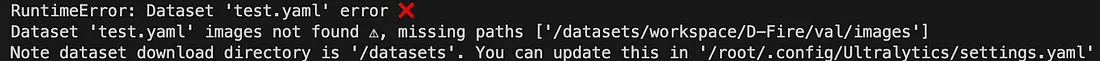

Create a configuration file

path: /D-Fire
train: train/images # relative to path
val: val/images # relative to path
test: test/images # relative to path

names:
0: smoke
1: fire

 Start training

pip install ultralytics 


In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8n.pt') # load an official model
PROJECT = 'project_name' # project name
NAME = 'experiment_name' # run name

model.train(
  data = 'data.yaml',
  task = 'detect',
  epochs = 200,
  verbose = True,
  batch = 64,
  imgsz = 640,
  patience = 20,
  save = True,
  device = 0,
  workers = 8,
  project = PROJECT,
  name = NAME,
  cos_lr = True,
  lr0 = 0.0001,
  lrf = 0.00001,
  warmup_epochs = 3,
  warmup_bias_lr = 0.000001,
  optimizer = 'Adam',
  seed = 42,
)

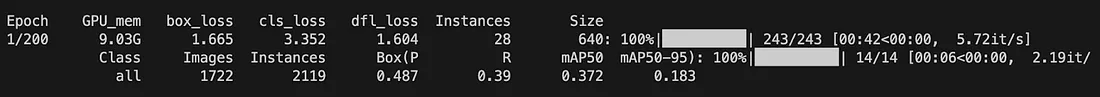

 Results

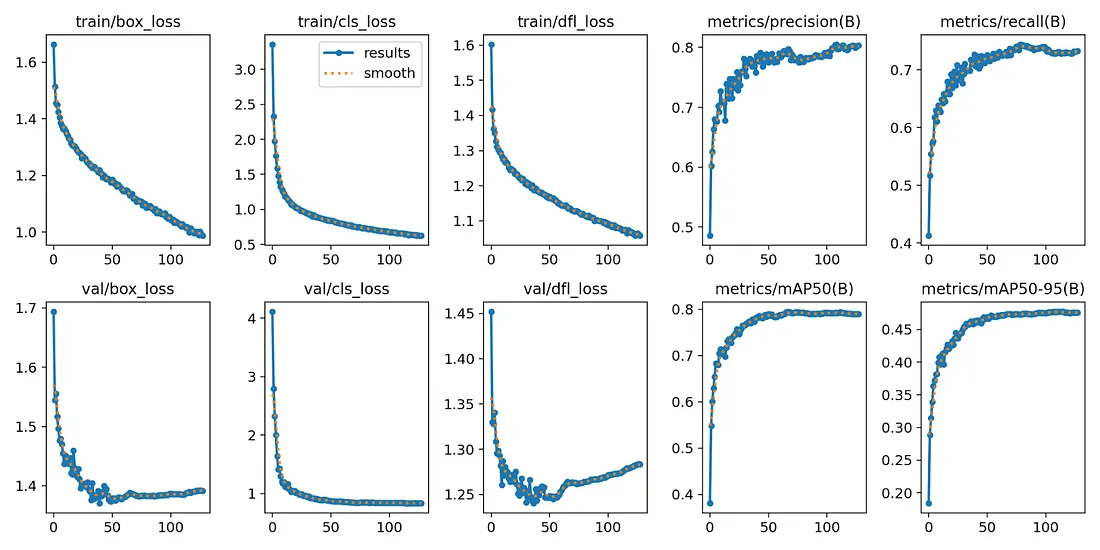

In [ ]:
rom ultralytics import YOLO
model = YOLO('project_name/experiment_name/weights/best.pt')
model.val(split='test', batch=48, imgsz=640, verbose=True, conf = 0.1, iou = 0.5)

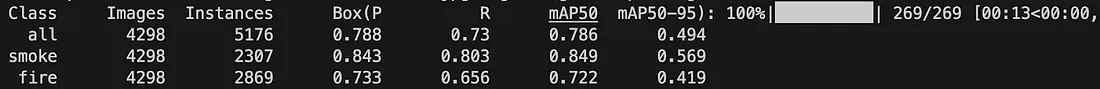